<a href="https://colab.research.google.com/github/Jymas/Jymas/blob/main/Snippets_Importing_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [1]:
!pip install matplotlib-venn

In [2]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


# Install 7zip reader [libarchive](https://pypi.python.org/pypi/libarchive)

In [3]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 126284 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1.5_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1.5) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1.5) ...
Processing triggers for man-db (2.10.2-1) ...
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.1 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31629 sha256=fc5d6860102087872a747b62f395ad07df1c81a9ed8b2636df5148232cb46d17
  Stored in directory: /root/.cache/pip/wheels/32/98/bd/4893d6923dd027f455b250367d402bfd69a6f4416581df46db
Successfully built libarchive


# Install GraphViz & [PyDot](https://pypi.python.org/pypi/pydot)

In [4]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

# Install [cartopy](http://scitools.org.uk/cartopy/docs/latest/)

In [5]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 96.0 MB/s eta 0:00:00


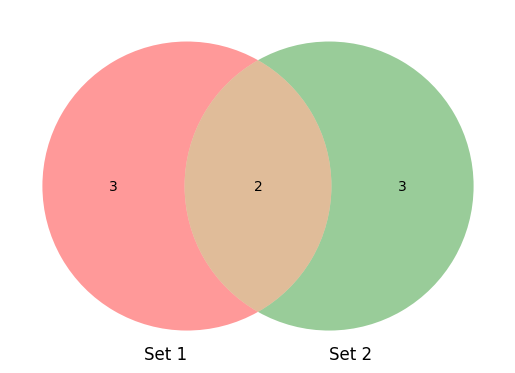

In [6]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Define the sizes of the two sets
set1 = {1, 2, 3, 4, 5}
set2 = {4, 5, 6, 7, 8}

# Create the Venn diagram
venn2([set1, set2], set_labels=('Set 1', 'Set 2'))

# Show the plot
plt.show()

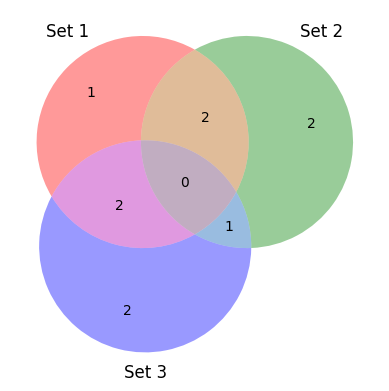

In [7]:
from matplotlib_venn import venn3

set3 = {1, 2, 8, 9, 10}

venn3([set1, set2, set3], set_labels=('Set 1', 'Set 2', 'Set 3'))
plt.show()

In [ ]:
import tensorflow


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


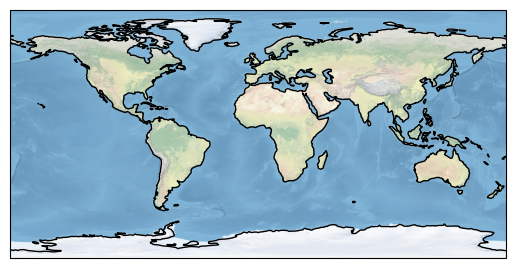

In [8]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
plt.show()

In [16]:
import tensorflow as tf
import os

# Download and extract the dataset
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_extracted', 'cats_and_dogs_filtered')

print(f"Dataset extracted to: {PATH}")

Dataset extracted to: /root/.keras/datasets/cats_and_dogs_extracted/cats_and_dogs_filtered


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(PATH, 'train'),
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    os.path.join(PATH, 'validation'),
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
import os

# List the contents of the extracted directory
print(os.listdir(PATH))

['cats_and_dogs_filtered']


In [18]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Define the model
img_input = layers.Input(shape=(150, 150, 3))

# Convolutional layers
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten and dense layers
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(img_input, output)

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Print a summary of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 - 58s - 579ms/step - accuracy: 0.5615 - loss: 0.6816 - val_accuracy: 0.6140 - val_loss: 0.6581
Epoch 2/15
100/100 - 80s - 805ms/step - accuracy: 0.6380 - loss: 0.6455 - val_accuracy: 0.6090 - val_loss: 0.6516
Epoch 3/15
100/100 - 82s - 824ms/step - accuracy: 0.6895 - loss: 0.6017 - val_accuracy: 0.6570 - val_loss: 0.6438
Epoch 4/15
100/100 - 57s - 571ms/step - accuracy: 0.7180 - loss: 0.5457 - val_accuracy: 0.6840 - val_loss: 0.6244
Epoch 5/15
100/100 - 55s - 551ms/step - accuracy: 0.7710 - loss: 0.4816 - val_accuracy: 0.6710 - val_loss: 0.6492
Epoch 6/15
100/100 - 83s - 827ms/step - accuracy: 0.8400 - loss: 0.3632 - val_accuracy: 0.6680 - val_loss: 0.7173
Epoch 7/15
100/100 - 80s - 803ms/step - accuracy: 0.8890 - loss: 0.2581 - val_accuracy: 0.7080 - val_loss: 0.7940
Epoch 8/15
100/100 - 82s - 824ms/step - accuracy: 0.9130 - loss: 0.2159 - val_accuracy: 0.6430 - val_loss: 0.9008
Epoch 9/15
100/100 - 82s - 817ms/step - accuracy: 0.9540 - loss: 0.1324 - val_accuracy: 0.7020 - va

### Treinando o Modelo

Agora vamos treinar o modelo com o método `fit`. Este método irá:

*   **`train_generator`**: Usar o gerador de dados de treinamento que criamos para fornecer as imagens e os rótulos ao modelo.
*   **`steps_per_epoch=100`**: Executar 100 lotes de imagens de treinamento em cada época. Como nosso `batch_size` é 20, isso significa que o modelo verá 2000 imagens de treinamento em cada época (100 * 20 = 2000).
*   **`epochs=15`**: Executar o processo de treinamento 15 vezes.
*   **`validation_data=validation_generator`**: Usar o gerador de dados de validação para avaliar o desempenho do modelo em dados que ele não viu durante o treinamento.
*   **`validation_steps=50`**: Executar 50 lotes de imagens de validação em cada época (50 * 20 = 1000).
*   **`verbose=2`**: Imprimir uma linha de log para cada época.

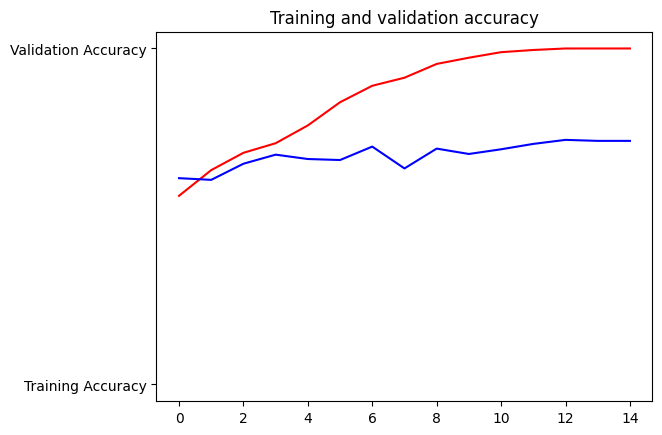

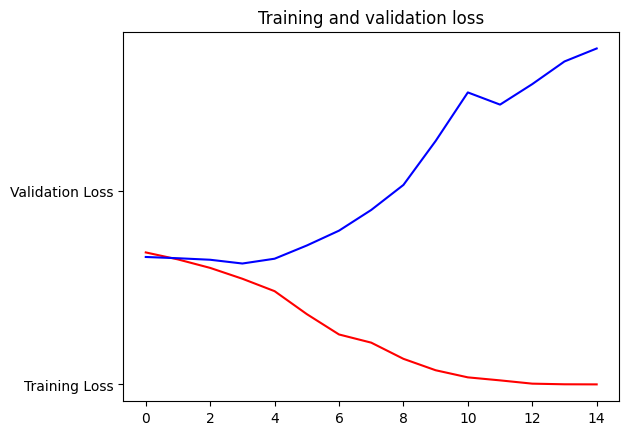

In [20]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss')

plt.show()

In [21]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Define the model with Dropout
img_input = layers.Input(shape=(150, 150, 3))

# Convolutional layers
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten and dense layers
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)  # Add Dropout
output = layers.Dense(1, activation='sigmoid')(x)

# Create the model
model_with_dropout = Model(img_input, output)

# Compile the model
model_with_dropout.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Print a summary of the model
model_with_dropout.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [1]:
history_with_dropout = model_with_dropout.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

NameError: name 'model_with_dropout' is not defined